<a href="https://colab.research.google.com/github/KgadiKatse/Other-Machine-Learning/blob/main/DOMINANCE_BASED_MULTI_OBJECTIVE_SIMULATED_ANNEALING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBMOSA Set Up**

Required packages and modules are loaded

In [1]:
import numpy as np
from numpy import asarray
from numpy import array
from numpy.random import rand
from numpy.random import randn
import random
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
import collections
import pandas as pd
random.seed(40)

In [2]:
# Two Objective functions y_1 & y_2
# Minimise
def y_1(x):
  y1 = x**2
  return y1

# Minimise
def y_2(x):
  y2 = (x-2)**2
  return y2

# Subject to the constraint
constraint = asarray([[-10**5,10**5]])




# **DOMINANCE-BASED MULTI-OBJECTIVE SIMULATED ANNEALING**

Input Parameters:

*   i_max - maximum number of epochs
*   c_max - maximum number of accepted solutions
*   d_max - maximum number of rejected solutions
*   T - Temperature
*   Cooling and heating schedule
*   metropolis - the acceptance probability of the metropolis rule
*   iterations
*   archive
*   delta_e - change in energy


## **Variables Parameters Chosen**

i_max

*   Number of epochs: 100
*   Length of epochs: Static Paradigm

t_max = 1000

c_max: 20

d_max: 10

Temperature, T:

Minimum Temperature, T_min = 0.01

Accept All, high temperature = 0.9

Cooling parameter, cooling = 0.1

Heating parameter, heating = 0.15

Cooling Schedule: Linear schedule T = (T - cooling) or T = (T + heating)

Step size = 10,000



In [3]:
random.seed(40)
initial_point = constraint[:, 0] + rand(len(constraint)) * (constraint[:, 1] - constraint[:, 0])

In [4]:
initial_point

array([38245.21162064])

In [5]:
def neighbour(s):
  candidate_sol = s + randn(len(constraint)) * step_size
  return candidate_sol

In [6]:
  # The archive for solutions
  the_archive = []
  # The number of solutions in the archive that
  # dominate the current solution
  archive_tilde = []

In [7]:
def update_archive(new_variable, the_archive):
  # update the archive and check for dominated solutions
  nsol_y1 = y_1(new_variable) # evaluating the new variable
  nsol_y2 = y_2(new_variable)
  dominated_solution = False
  archive_tilde.append(new_variable)
  for variable in the_archive:
    # checking if the new solution dominates any solutions in the archive
    solution_y1 = y_1(variable)
    solution_y2 = y_2(variable)
    if(nsol_y1 < solution_y1 and nsol_y2 == solution_y2 or
       nsol_y1 == solution_y1 and nsol_y2 < solution_y2
       ):
      dominated_solution = True
      number_of_dominated = -1
      print("Solution in the archive {} has dominated the new solution {}".format(variable,new_variable))
      print("Archive solution f_1: {} and f_2: {}".format(solution_y1, solution_y2))
      the_archive.remove(variable) # the dominated solution in the archive is removed
      # remove the solution if its dominated
    elif(solution_y1 < nsol_y1 and solution_y2 == nsol_y2 or
         solution_y1 == nsol_y1 and solution_y2 < nsol_y2
         ):
      dominated_solution = True
      number_of_dominated = 1
      archive_tilde.remove(new_variable) # the dominated variable, the neighbour is removed from the archive
      print("The new solution {} has dominated the archive solution {}".format(new_variable,variable))
      print("New solution f_1: {} and f_2: {}".format(nsol_y1, nsol_y2))

    else:
      dominated_solution == False
      number_of_dominated = 0 # no solution was dominated thus..
      solution_y1 = nsol_y1 # the new neighbour point is accepted into a function as a new variable point
      solution_y2 = nsol_y2
  # parameters to use for testing the acceptance probability of a variable point
  delta_e = float((number_of_dominated)/len(archive_tilde)) # The energy difference E
  metropolis = math.exp(-delta_e/T) # The metropolis acceptance rule probability parameter

  return archive_tilde

In [8]:
    # The archive for solutions
    the_archive = []
    # The number of solutions in the archive that dominate the current solution
    archive_tilde = []
    # Initial and Maximum number of epochs
    i_m = 1
    i_max = 50
    # Maximum number of accepted solutions
    c_m = 0
    c_max = 20
    # Maximum number of rejected solutions
    d_m = 0
    d_max = 10
    # Iterations
    t = 1
    t_max = 1000
    # step size between neighbours
    step_size = 10**4
    # The starting temperature, set to Accept All
    T = 0.9
    T_min = 0.01

    # Cooling schedule parameter
    cooling = 0.2
    # Heating schedule parameter
    heating = 0.25

In [10]:
number_of_dominated = 0

def pareto_front(initial_point):

    # The archive for solutions
    the_archive = []
    # The number of solutions in the archive that dominate the current solution
    archive_tilde = []
    # Initial and Maximum number of epochs
    i_m = 1
    i_max = 50
    # Maximum number of accepted solutions
    c_m = 0
    c_max = 20
    # Maximum number of rejected solutions
    d_m = 0
    d_max = 10
    # Iterations
    t = 1
    t_max = 1000
    # step size between neighbours
    step_size = 10**4
    # The starting temperature, set to Accept All
    T = 0.9
    T_min = 0.01
    # Cooling schedule parameter
    cooling = 0.2
    # Heating schedule parameter
    heating = 0.25
    # Initial point assigned to the name variable point

    variable_point = initial_point




    while i_m <= i_max: # while the number of epochs is below the maximum number of iterations
        the_archive.append(variable_point)
        archive_tilde.append(variable_point)
        # The input (current value) to be considered is inputted into the two archives for further evaluation

        if(i_m == i_max):
          return the_archive # Termination occurs once the maximum number of epochs has been reached
          break

        elif(d_m == d_max): # when the maximum number of rejections are recorded, there will be an..
            T = T*heating # increase the temperature,
            i_m += 1 # increment of the number of epochs,
            c_m = 0 # re-initialization of the number of accepted solutions
            d_m = 0 # re-initialization of the number of rejected solutions

        else:
          if(c_m == c_max):# when the maximum number of rejections are recorded, there will be an..
            T = T*cooling # decrease the temperature,
            i_m += 1 # increment of the number of epochs,
            c_m = 0 # re-initialization the number of accepted solutions,
            d_m = 0 # re-initialization the number of rejected solutions,




        while t <= t_max: # while the current iteration running is not yet equal to the maximum number of iterations
            print("Iteration Number: {} and Epoch Number: {}".format(t,i_m))
            current_sol = variable_point # the variable point is reassigned as the current point
            sol_y1 = y_1(current_sol) # which is then evaluated using the two functions
            sol_y2 = y_2(current_sol)
            print("Current point:",current_sol)
            print("Solution of objective function 1:",sol_y1)
            print("Solution of objective function 2:",sol_y2)
            the_archive.append(current_sol) # The current solution is added to the list of solutions in the archive
            neighbouring_solution = neighbour(current_sol) # The neighbouring solution of the current is obtained
            print("The neighouring solution of the current point:",neighbouring_solution)
            archive_tilde = update_archive(neighbouring_solution,archive_tilde)
            print("Current number of solutions in the archive: {} and archive tilde: {}".format(len(the_archive), len(archive_tilde)))

            if(number_of_dominated == 0): # if no dominated solution in the archives exist
              print("No solution dominated in iteration:",t)
              print("Solution Status: Accepted")
              solution_y1 = y_1(neighbouring_solution) # the new solution is accepted
              solution_y2 = y_2(neighbouring_solution)
              print("Accepted variable: {} and accepted solutions f_1 = {} f_2 = {}".format(neighbouring_solution, solution_y1, solution_y2))
              variable_point = neighbouring_solution # the new solution then becomes the current solution
              c_m += 1 # Incremement of number of accepted solutions
              t += 1 # increment of number of iterations
              print("Number of accepted solutions c_m:", c_m)
            # the number of accepted solutions increases as the iteration number increments


            elif(number_of_dominated != 0): # if there is a solution that is either dominated or dominates
              if(random.uniform(0,1) > metropolis): # a random number generated is compared to the metropolis probability
                accept = False # which, if lesser (the random number) the solution is rejected
                print("Solution Status: Rejected")
                print("Number of rejected solutions d_m:", d_m)
                print("Iteration Number: {} and Epoch Number: {}".format(t, i_m))
                variable_point = current_sol # the new variable point remains as the current solution
                print("The current solution then remains as the current solution for the next iteration")
                d_m += 1 # Incremement of number of rejected solutions
                t += 1 # increment of number of iterations

              else:
                accept = True # if the random number is larger, the solution is accepted
                print("Solution Status: Accepted")
                # the accepted solution is the neighbouring solution (the new variable)
                print("Accepted variable: {} and accepted solutions f_1 = {} f_2 = {}".format(neighbouring_solution, solution_y1, solution_y2))
                the_archive.append(neighbouring_solution) # the variable is added to the archive
                print("Number of accepted solutions c_m:", c_m)
                print("Iteration Number: {} and Epoch Number: {}".format(t, i_m))
                variable_point = neighbouring_solution # the neighbour solution then becomes the new variable point
                c_m += 1 # Incremement of number of accepted solutions
                t += 1 # increment of number of iterations




            if(c_m == c_max):
                T = T*cooling # increase the temperature
                i_m += 1 # increment the number of epochs
                c_m = 0 # re-initialize the number of accepted solutions
                d_m = 0 # re-initialize the number of rejected solutions
                continue

            elif(d_m == d_max):
                T = T*heating # increase the temperature
                i_m += 1 # increment the number of epochs
                c_m = 0 # re-initialize the number of accepted solutions
                d_m = 0 # re-initialize the number of rejected solutions
                continue

            else:
                if(T <= T_min ): # Once minimum temperature is reached, the program terminates
                    print("Minimum temperature exceeded, Temperature:", T)
                    print("Termination of cycle")
                    break

                continue

            variable_point

        return the_archive





In [11]:
p_e = pareto_front(initial_point)

Iteration Number: 1 and Epoch Number: 1
Current point: [38245.21162064]
Solution of objective function 1: [1.46269621e+09]
Solution of objective function 2: [1.46254324e+09]
The neighouring solution of the current point: [54819.18540852]
Current number of solutions in the archive: 2 and archive tilde: 1
No solution dominated in iteration: 1
Solution Status: Accepted
Accepted variable: [54819.18540852] and accepted solutions f_1 = [3.00514309e+09] f_2 = [3.00492382e+09]
Number of accepted solutions c_m: 1
Iteration Number: 2 and Epoch Number: 1
Current point: [54819.18540852]
Solution of objective function 1: [3.00514309e+09]
Solution of objective function 2: [3.00492382e+09]
The neighouring solution of the current point: [57028.81413503]
Current number of solutions in the archive: 3 and archive tilde: 2
No solution dominated in iteration: 2
Solution Status: Accepted
Accepted variable: [57028.81413503] and accepted solutions f_1 = [3.25228564e+09] f_2 = [3.25205753e+09]
Number of accept

In [12]:
print(tabulate(archive_tilde, headers = ["index", "f_2"], showindex ="always", tablefmt = "presto"))

   index |      f_2
---------+----------
       0 |  54819.2
       1 |  57028.8
       2 |  71274
       3 |  73505.8
       4 |  64806.7
       5 |  82702.5
       6 |  81024.2
       7 |  69847.2
       8 |  74450.7
       9 |  71954.9
      10 |  90498.2
      11 |  98134.1
      12 |  86211.4
      13 |  74083.8
      14 |  68353
      15 |  64084.9
      16 |  52834.6
      17 |  56721.7
      18 |  55475
      19 |  54368.7
      20 |  49461.1
      21 |  42279.5
      22 |  48566.8
      23 |  45551.1
      24 |  50831
      25 |  65372.9
      26 |  78017.8
      27 |  83322.1
      28 |  81714.5
      29 |  70964.1
      30 |  71122.9
      31 |  95141.2
      32 |  87500.7
      33 |  95781.2
      34 |  91941.4
      35 |  98225.7
      36 | 108328
      37 | 116690
      38 | 121566
      39 | 116286
      40 | 105474
      41 |  91986.7
      42 |  96075.5
      43 |  95515.7
      44 |  95186
      45 |  98521.2
      46 |  96166.5
      47 |  89010.1
      48 |  92089.5

In [13]:
df = pd.DataFrame(archive_tilde)

In [14]:
for i in df:
    f_1 = y_1(df[i])
    f_2 = y_2(df[i])

In [15]:
df["f_1"] = f_1
df["f_2"] = f_2

In [16]:
df.columns = ['x', 'f_1', 'f_2']

In [17]:
df

,x,f_1,f_2
0,54819.185409,3.005143e+09,3.004924e+09
1,57028.814135,3.252286e+09,3.252058e+09
2,71273.992118,5.079982e+09,5.079697e+09
3,73505.802910,5.403103e+09,5.402809e+09
4,64806.652339,4.199902e+09,4.199643e+09
...,...,...,...
56,112354.012898,1.262342e+10,1.262297e+10
57,116148.225227,1.349041e+10,1.348995e+10
58,104883.612329,1.100057e+10,1.100015e+10
59,108402.334621,1.175107e+10,1.175063e+10


In [18]:
yf_1 = f_1 * 10**-5
yf_2 = f_2 * 10**-5

In [19]:
df2 = pd.DataFrame(archive_tilde)
df2["yf_1"] = yf_1
df2["yf_2"] = yf_2


In [20]:
df2.columns = ['x', 'yf_1', 'yf_2']
df2

,x,yf_1,yf_2
0,54819.185409,30051.430889,30049.238161
1,57028.814135,32522.856416,32520.575304
2,71273.992118,50799.819524,50796.968605
3,73505.802910,54031.030614,54028.090422
4,64806.652339,41999.021874,41996.429648
...,...,...,...
56,112354.012898,126234.242142,126229.748022
57,116148.225227,134904.102233,134899.456344
58,104883.612329,110005.721351,110001.526047
59,108402.334621,117510.661514,117506.325460


/tmp/ipython-input-3881135074.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


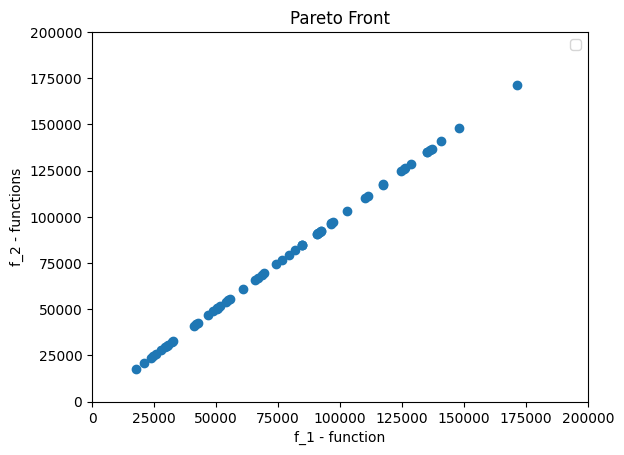

In [21]:
# plotting the line
plt.scatter(yf_1, yf_2,)
plt.xlabel('f_1 - function')
# Set the y axis label of the current axis.
plt.ylabel('f_2 - functions')
# Set a title
plt.title('Pareto Front')
# show a legend on the plot
plt.legend()
plt.ylim([0, 200000])
plt.xlim([0, 200000])
# Display a figure.
plt.show()





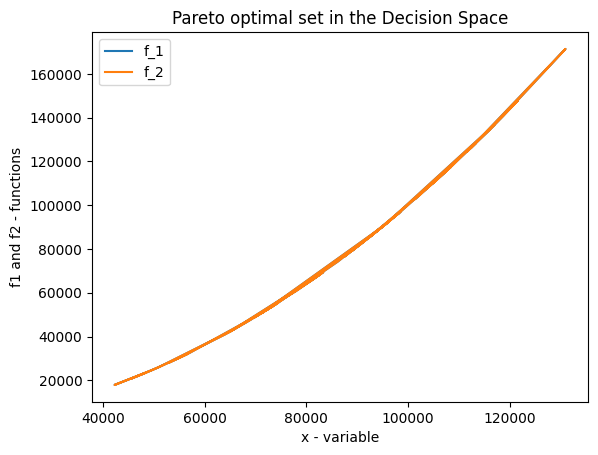

In [22]:
# plotting the line 1 points
plt.plot(df2['x'], yf_1, label = "f_1")
# plotting the line 2 points
plt.plot(df2['x'], yf_2, label = "f_2")
plt.xlabel('x - variable')
# Set the y axis label of the current axis.
plt.ylabel('f1 and f2 - functions')
# Set a title of the current axes.
plt.title('Pareto optimal set in the Decision Space')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()



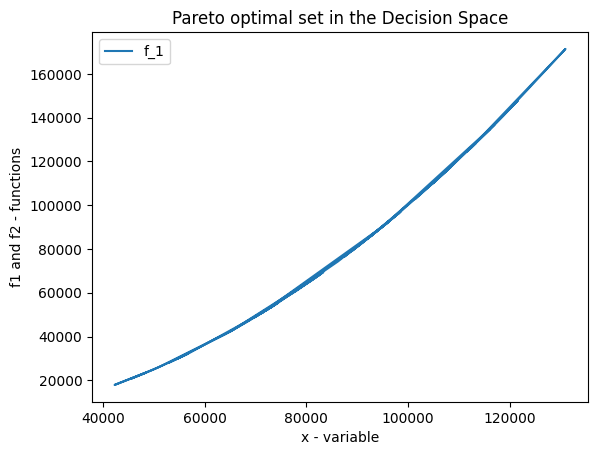

In [23]:
# plotting the line 1 points
plt.plot(df2['x'], yf_1, label = "f_1")
plt.xlabel('x - variable')
# Set the y axis label of the current axis.
plt.ylabel('f1 and f2 - functions')
# Set a title of the current axes.
plt.title('Pareto optimal set in the Decision Space')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()